In [1]:
# Import data and modules
import pandas as pd
import numpy as np
import matplotlib as plt

# To be able to import from other notebook
!pip3 install nbimporter
import nbimporter
from extraction import extract_data

# To show all data in dataframe
pd.set_option('display.max_colwidth', None)
# Set higher DPI for graphs
plt.rcParams['figure.dpi'] = 150

raw = pd.read_json("data/kym.json")  # meme templates from Know Your Meme, 16 features
events = pd.read_json("data/events.json")  # memes with timestamps from origin and spread
memes = extract_data(raw, events)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Found 12654 memes matching these criteria.


In [3]:
memes.head()

title  \
0  This is Relevant To My Interests   
1                        ROFLcopter   
2                Bitches Don't Know   
3               Leave Britney Alone   
4                            O RLY?   

                                                               url  \
0  https://knowyourmeme.com/memes/this-is-relevant-to-my-interests   
1                        https://knowyourmeme.com/memes/roflcopter   
2                 https://knowyourmeme.com/memes/bitches-dont-know   
3               https://knowyourmeme.com/memes/leave-britney-alone   
4                             https://knowyourmeme.com/memes/o-rly   

  last_update_source  \
0         2019-01-09   
1         2020-06-06   
2         2020-12-15   
3         2021-02-12   
4         2021-03-13   

                                                                      template_image_url  \
0  https://i.kym-cdn.com/entries/icons/original/000/000/021/relevant-to-my-interests.jpg   
1              https://i.kym-cdn.com/entries/icons/original/000/000/023/roflcopter-2.jpg   
2         https://i.kym-cdn.com/entries/icons/original/000/000/022/bitches-dont-know.jpg   
3                  https://i.kym-cdn.com/entries/icons/original/000/000/016/brittnee.jpg   
4                   https://i.kym-cdn.com/entries/icons/original/000/000/015/oreally.jpg   

                added  \
0 2008-12-12 22:12:41   
1 2008-12-12 22:13:27   
2 2008-12-12 22:13:01   
3 2008-12-12 22:11:00   
4 2008-12-12 22:10:42   

                                                                                                                details  \
0                                            {'status': 'confirmed', 'origin': 'I Can Has Cheezburger', 'year': '2006'}   
1   {'status': 'confirmed', 'origin': 'Warcraft III', 'year': '2004', 'type': ['https://knowyourmeme.com/types/slang']}   
2  {'status': 'confirmed', 'origin': 'MySpace', 'year': '2006', 'type': ['https://knowyourmeme.com/types/exploitable']}   
3                                                          {'status': 'confirmed', 'origin': 'YouTube', 'year': '2007'}   
4                                                  {'status': 'confirmed', 'origin': 'Something Awful', 'year': '2003'}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [20]:
# Making a screenshot for the thesis
pd.set_option('display.max_colwidth', 18)
raw.head(5)
for c in raw['content']:
    print(len(str(c)))
    break

5992


In [3]:
# Status distribution
status_dict = {}
c = 0
for d in memes['details']:
    if 'status' in d.keys():
        status = d['status']
        if status in status_dict.keys():
            status_dict[status] += 1
        else:
            status_dict[status] = 1
            
print("Status distribution:", status_dict)

Status distribution: {'confirmed': 3266, 'deadpool': 4478, 'submission': 4908, 'unlisted': 2}


In [19]:
# Collecting most important verbs in events (timestamps)
verbs = ["posted", "linked", "coined", "submitted", "made", "taken", "is", "was", "recorded", "uploaded", "began", "released", "created", "appeared", "used", "begun", "began", "launched", "featured"]
count = {key:0 for key in verbs}
for stamplist in memes["origin"]:
    for stamp in stamplist:
        for verb in verbs:
            if verb in stamp[2]:
                count[verb] += 1
                
print("Verb frequency:", dict(sorted(count.items(), key=lambda item: item[1], reverse=True)))

Verb frequency: {'was': 3196, 'is': 2491, 'posted': 1165, 'uploaded': 1141, 'released': 630, 'began': 464, 'submitted': 452, 'created': 378, 'appeared': 236, 'launched': 222, 'used': 211, 'made': 158, 'featured': 145, 'taken': 115, 'coined': 63, 'recorded': 45, 'linked': 8, 'begun': 6}


In [2]:
# How many memes have multiple types and tags?
c = 0
for types in memes['type']:
    if len(types) > 1:
        c += 1
        
print("{}% of memes have multiple types.".format(round(c/len(memes), 2)))

0.06% of memes have multiple types.


# Visualizations

In [5]:
from matplotlib import pyplot as plt
from collections import Counter
from ast import literal_eval
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,12)
large_fontsize = 35
medium_fontsize = 25
small_fontsize = 15

# Colors used (green, blue, orange, gray)
hex1, hex2, hex3, hex4 = '#79ccb3', '#92cad1', '#e9724d', '#868686'

reaction = pd.read_csv("out/reaction.csv")
exploitable = pd.read_csv("out/exploitable.csv")
snowclone = pd.read_csv("out/snowclone.csv")

### Word clouds

In [38]:
# Get Origin
memes = extract_data(raw, events)
memes = memes.drop(columns=["origin"])  # this is NOT the meme Origin section, but from Events data

# Add origin as separate column
origin_col = []
missing_origin = []
for title, d in zip(memes['title'], memes['content']):
        if 'origin' in d.keys() and 'text' in d['origin'].keys():
            origin_col.append(" ".join(d['origin']['text']))
        elif 'origin' in d.keys() and 'subsections' in d['origin'].keys() and len(d['origin']['subsections'].keys()) != 0:
            orig_text = ""
            for key in d['origin']['subsections'].keys():
                if 'text' in d['origin']['subsections'][key].keys():
                    orig_text += " ".join(d['origin']['subsections'][key]['text']) + " "
            if len(orig_text) == 0:
                missing_origin.append(title)
                origin_col.append("")
            else:
                origin_col.append(orig_text.strip())
        else:
            missing_origin.append(title)
            origin_col.append("")
#memes = memes[~memes['title'].isin(missing_origin)]  # remove memes that have no "origin" specified
memes['origin'] = origin_col

# Add year as separate column
year_col = []
missing_year = []
for title, d in zip(memes['title'], memes['details']):
    if 'year' in d.keys() and d['year'] != None:
        year_col.append(d['year'])
    else:
        missing_year.append(title)
        year_col.append("")
#memes = memes[~memes['title'].isin(missing_year)]  # remove memes that have no "year" specified
memes['year'] = year_col

# Reorder and select columns
columns = ["url", "template_image_url", "origin"]
memes = memes[columns]

Found 12654 memes matching these criteria.


In [39]:
# median is 51 for Spread (without 0s). Else, it's 37.
# for About, it is 31 with 0s. Else, it is 47.
# for Origin, it is 37 with 0s. Else, it is 74.

#olengths = [len(o.split(" ")) for o in origin]
#olengths = [o for o in olengths if o > 1]
#np.median(olengths)

74.0

In [27]:
#wordlist = []
#for d in memes['content']:
#    if "spread" in d.keys() and "text" in d['spread'].keys():
#        for part in d['spread']['text']:
#            wordlist.append(part)
# aboutlist = [about for about in memes['about']]

#combinedlist = spreadlist + aboutlist + originlist
#with open("out/combined_wordcloud.txt", "w") as f:
#    for word in wordlist:
#        f.write(word + " ")

In [ ]:
# Count how many memes are missing origin
c = 0
for det in memes['details']:
    if 'origin' in det.keys() and len(det['origin']) > 0:
        pass
    else:
        c += 1
print("ORIGIN is missing for {} memes out of {}. Remember: some memes have multiple types.".format(c, len(memes)))

In [ ]:
# Count the median and avg number of types per meme
# Considering only memes that have type specified (very few)
lens = []
for t in memes['type']:
    if len(t) > 0:
        lens.append(len(t))
print(np.mean(lens))
print(np.median(lens))

In [ ]:
# Calculate average length of "About" section
about = [len(about.split(" ")) for about in memes['about']]
print(np.median(about))

### Distribution of TYPE

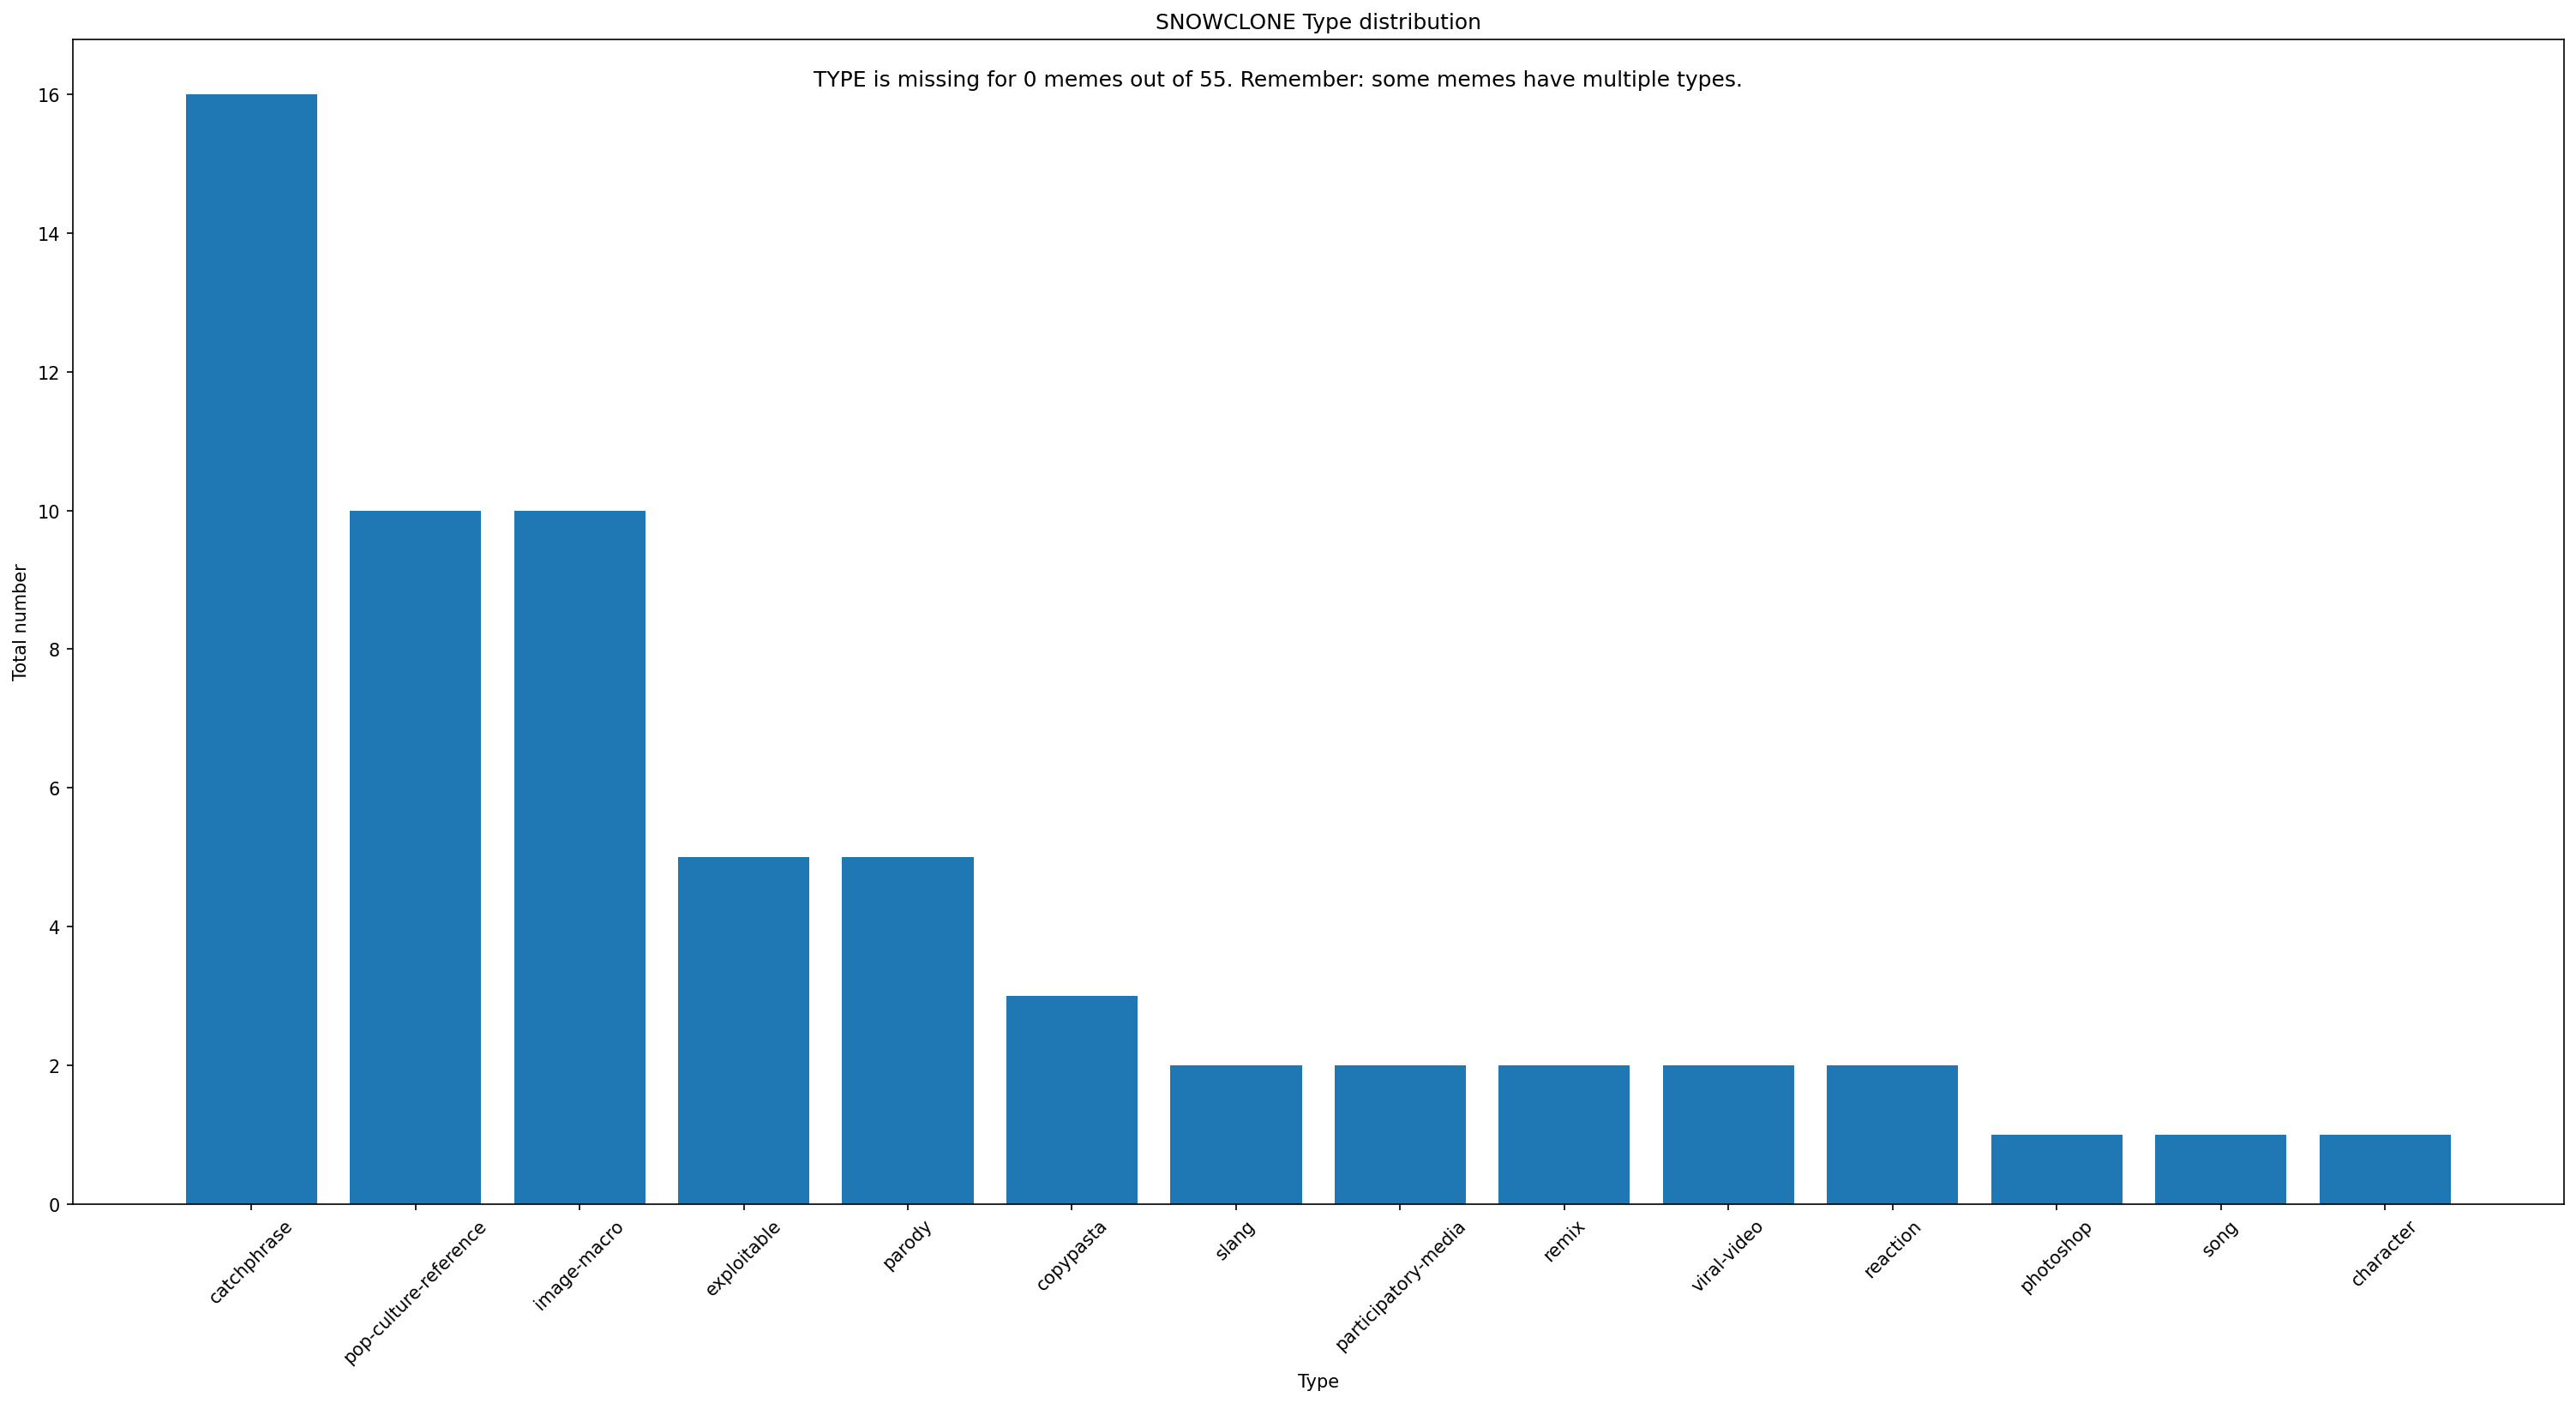

In [10]:
# Make frequency dictionary for ONE TYPE
data = snowclone

all_types = []
for typelist in data["other_types"]:
    for t in literal_eval(typelist):
        all_types.append(t)
type_freq = Counter(all_types)
text = "TYPE is missing for {} memes out of {}. Remember: some memes have multiple types."\
      .format(type_freq[''], len(data))

# Create bar plot
plot_data = dict(type_freq.most_common())
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Type')
plt.title("SNOWCLONE Type distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.85, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/types.png')
plt.show()

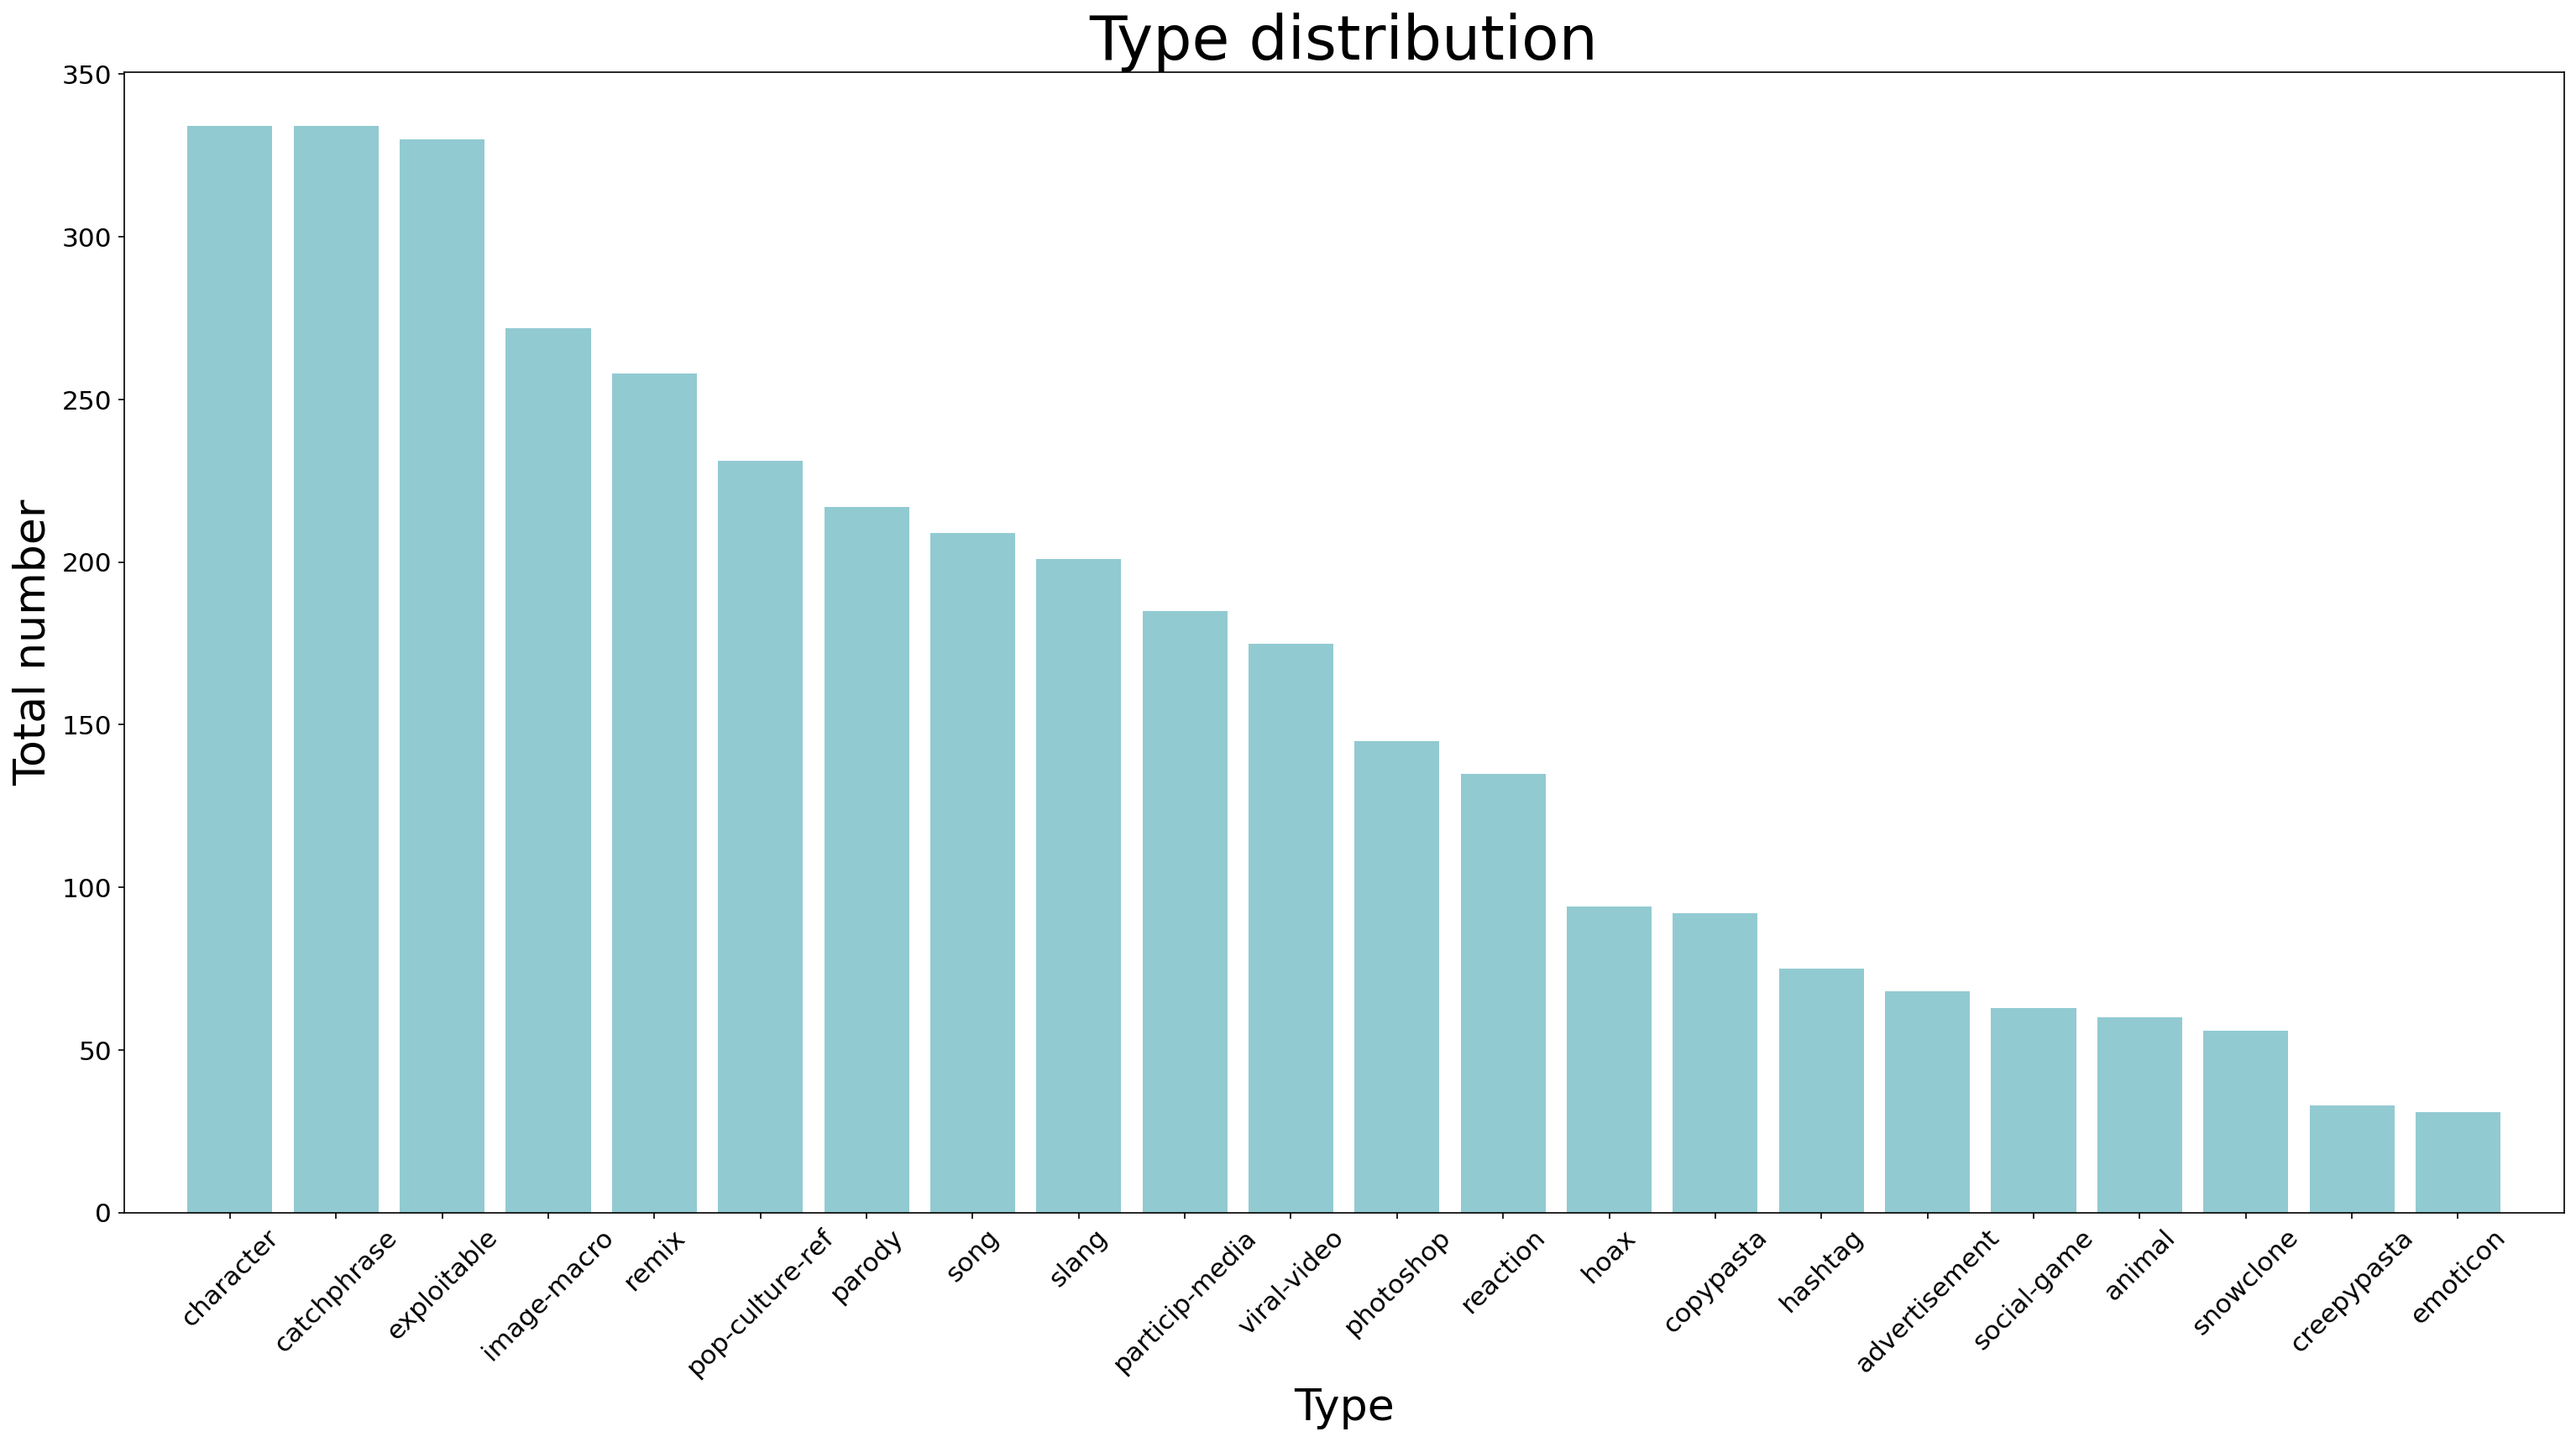

In [12]:
# Make frequency dictionary FOR ALL MEMES
data = memes

all_types = []
for typelist in data["type"]:
    if typelist == []:
        all_types.append("")
    for t in typelist:
        all_types.append(t)
        
type_freq = Counter(all_types)
text = "TYPE is missing for {} memes out of {}. Remember: some memes have multiple types."\
      .format(type_freq[''], len(data))
#plot_data['pop-culture-ref'] = plot_data.pop('pop-culture-reference')
type_freq['pop-culture-ref'] = type_freq['pop-culture-reference']
del type_freq['pop-culture-reference']
type_freq['particip-media'] = type_freq['participatory-media']
del type_freq['participatory-media']
type_freq['conspiracy'] = type_freq['conspiracy-theory']
del type_freq['conspiracy-theory']
type_freq['illusion'] = type_freq['optical-illusion']
del type_freq['optical-illusion']

# Create bar plot
plot_data = dict(type_freq.most_common())
plot_data = {str(key):val for key,val in plot_data.items() if int(val) >= 30}  # keep only items with at least 30 occurrences
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values(), color=hex2)
plt.ylabel('Total number', fontsize=medium_fontsize)
plt.xlabel('Type', fontsize=medium_fontsize)
plt.title("Type distribution", fontsize=large_fontsize)
plt.xticks(rotation = 45, fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.xlim([-1,len(plot_data.keys())])
# plt.figtext(0.5, 0.85, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/types.png', bbox_inches='tight')
plt.show()

### Distribution of YEAR

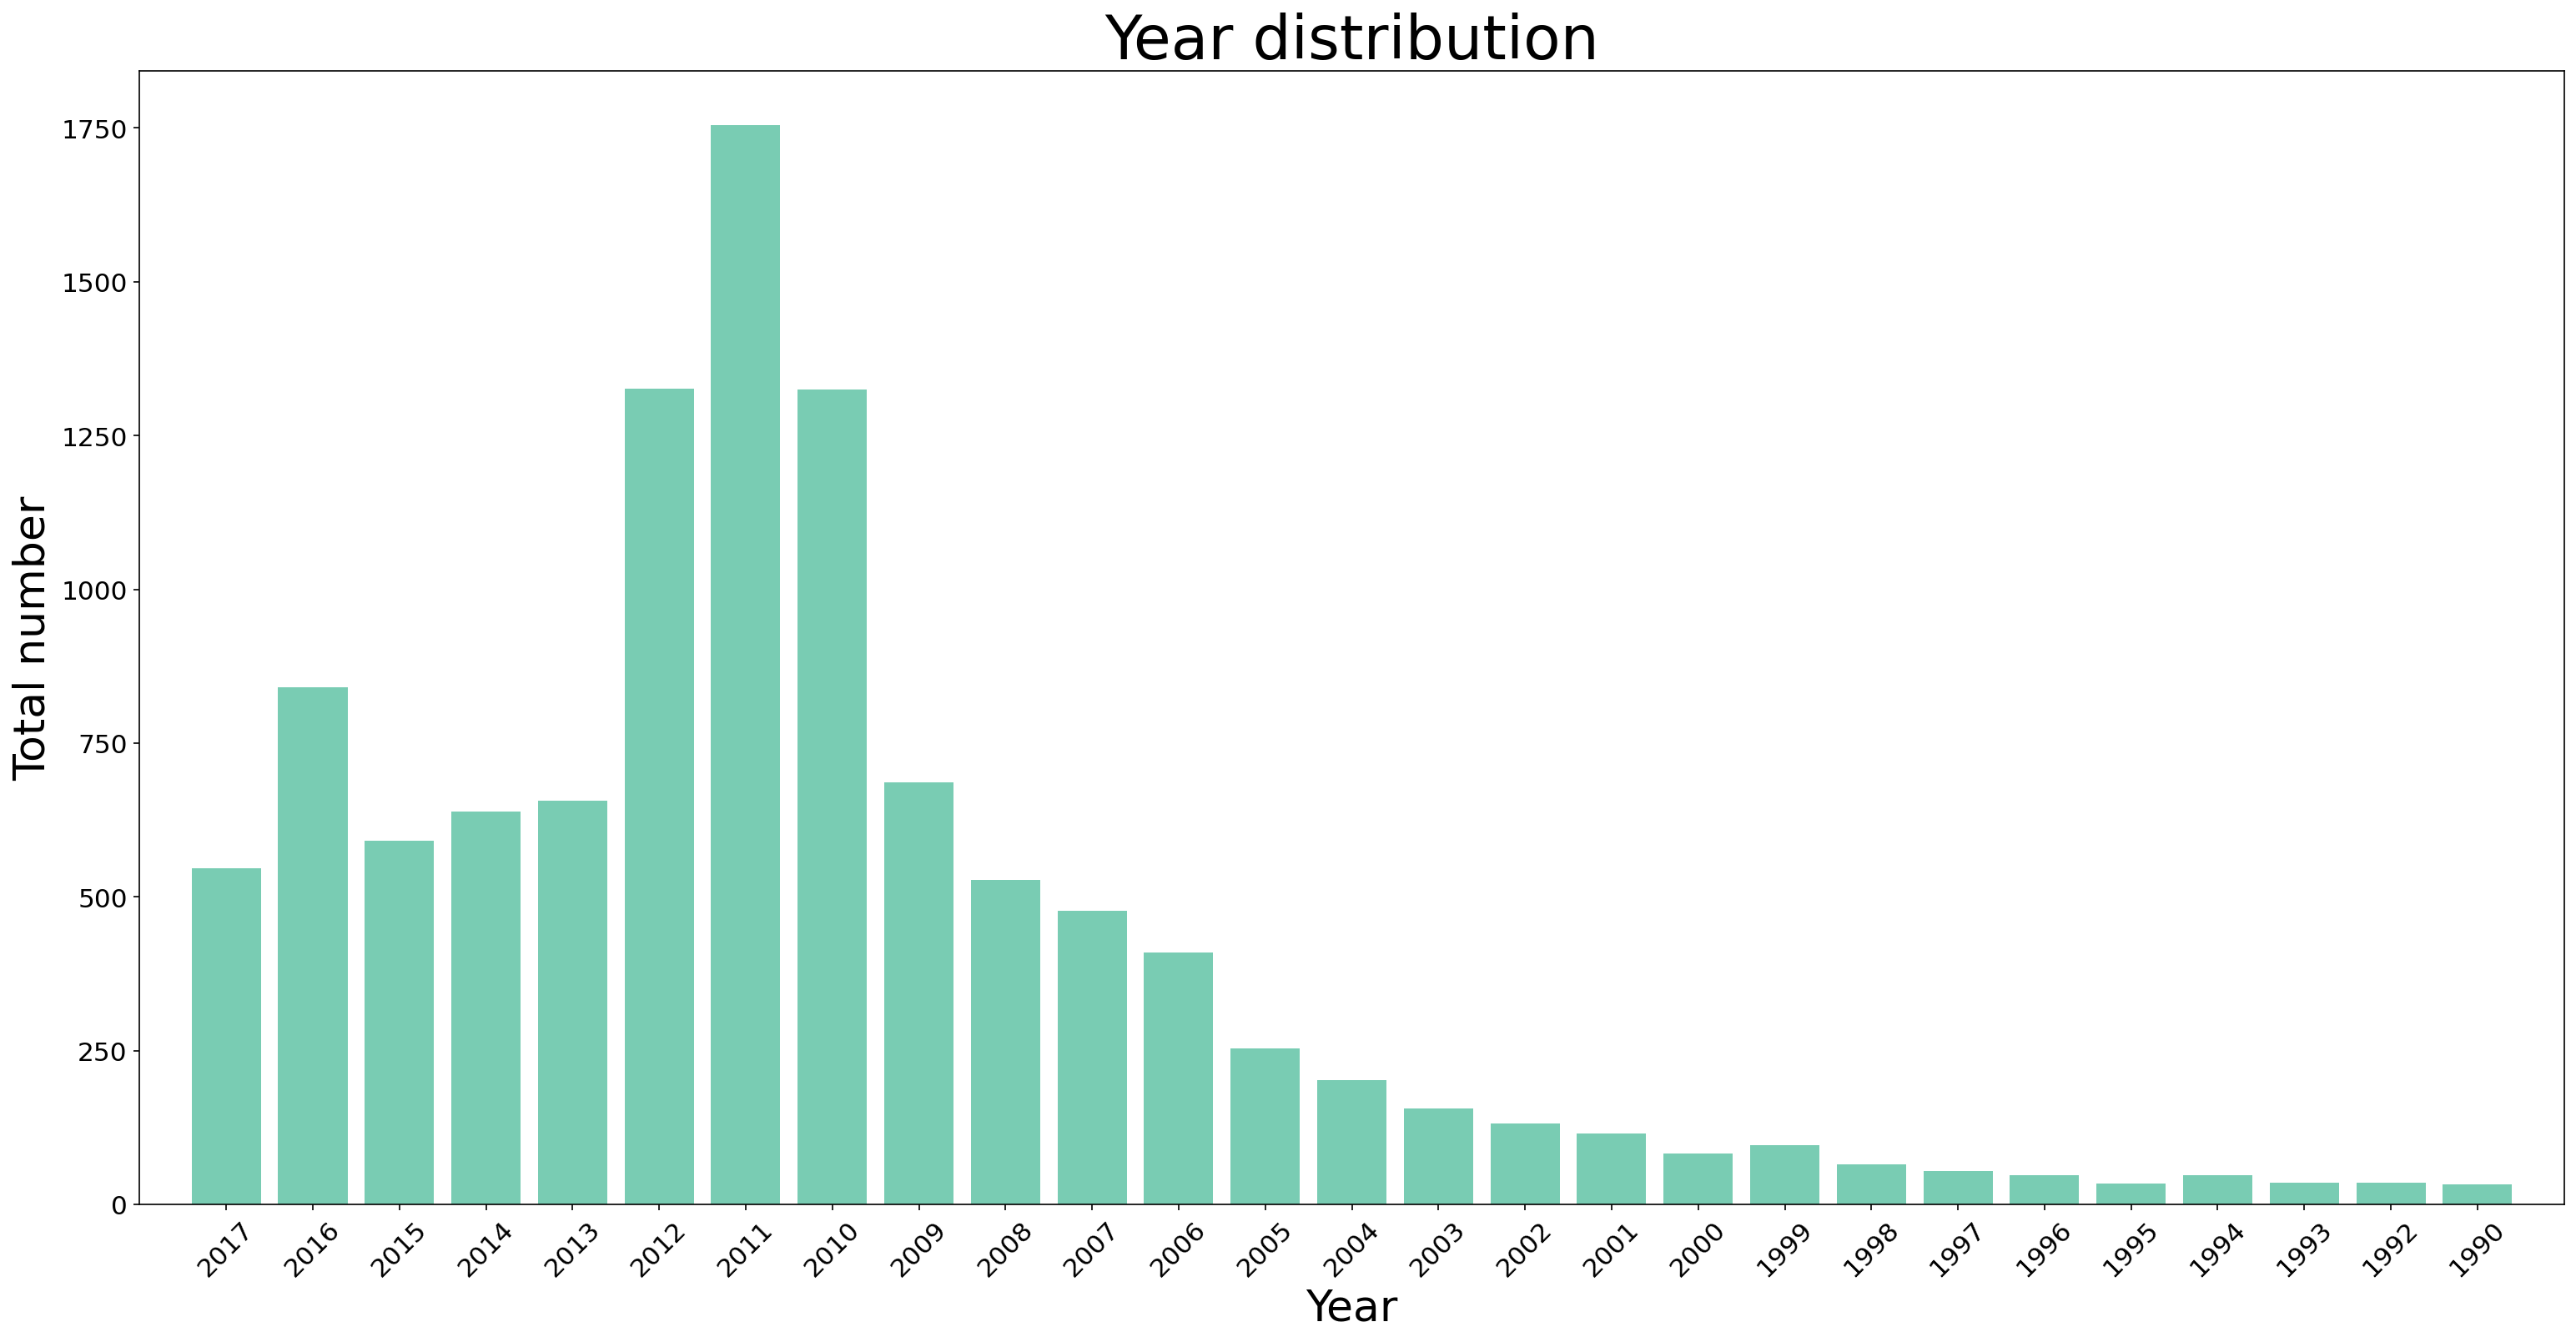

In [13]:
# Add year as separate column
year_col = []
missing_year = []
for title, d in zip(memes['title'], memes['details']):
    if 'year' in d.keys() and d['year'] != None:
        year_col.append(d['year'])
    else:
        year_col.append("")

memes['year'] = year_col

data = memes  # change this for specific types

year_freq = Counter(data['year'])
text = "YEAR is missing for {} memes out of {}."\
      .format(year_freq[''], len(data))


# Create bar plot
plot_data = dict(sorted(year_freq.items(), reverse=True))
plot_data = {str(key):val for key,val in plot_data.items() if int(val) >= 30}  # keep only items with at least 30 occurrences
plot_data = dict(sorted(plot_data.items(), reverse=True))
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values(), color=hex1)
plt.ylabel('Total number', fontsize=medium_fontsize)
plt.xlabel('Year', fontsize=medium_fontsize)
plt.title("Year distribution", fontsize=large_fontsize)
plt.xticks(rotation = 45, fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.xlim([-1,len(plot_data.keys())])
# plt.figtext(0.5, 0.05, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/years.png', bbox_inches='tight')
plt.show()

### Distribution of LAST_UPDATE_SOURCE

In [ ]:
# Extract only year from last_update

data = memes

last_update_col = []
for date in data["last_update_source"]:
    last_update_col.append(str(date)[:4])
data["last_update_source"] = last_update_col


update_freq = Counter(data["last_update_source"])
text = "LAST_UPDATE_SOURCE is missing for {} memes out of {}."\
      .format(update_freq[''], len(data))

# Create bar plot
plot_data = dict(sorted(update_freq.items(), reverse=True))
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Last_update year')
plt.title("SNOWCLONE Last_update distribution")
plt.xticks(rotation = 45)
plt.xlim([-1,len(plot_data.keys())])
plt.figtext(0.5, 0.05, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/last_update_source.png')
plt.show()

### Distribution of TAGS

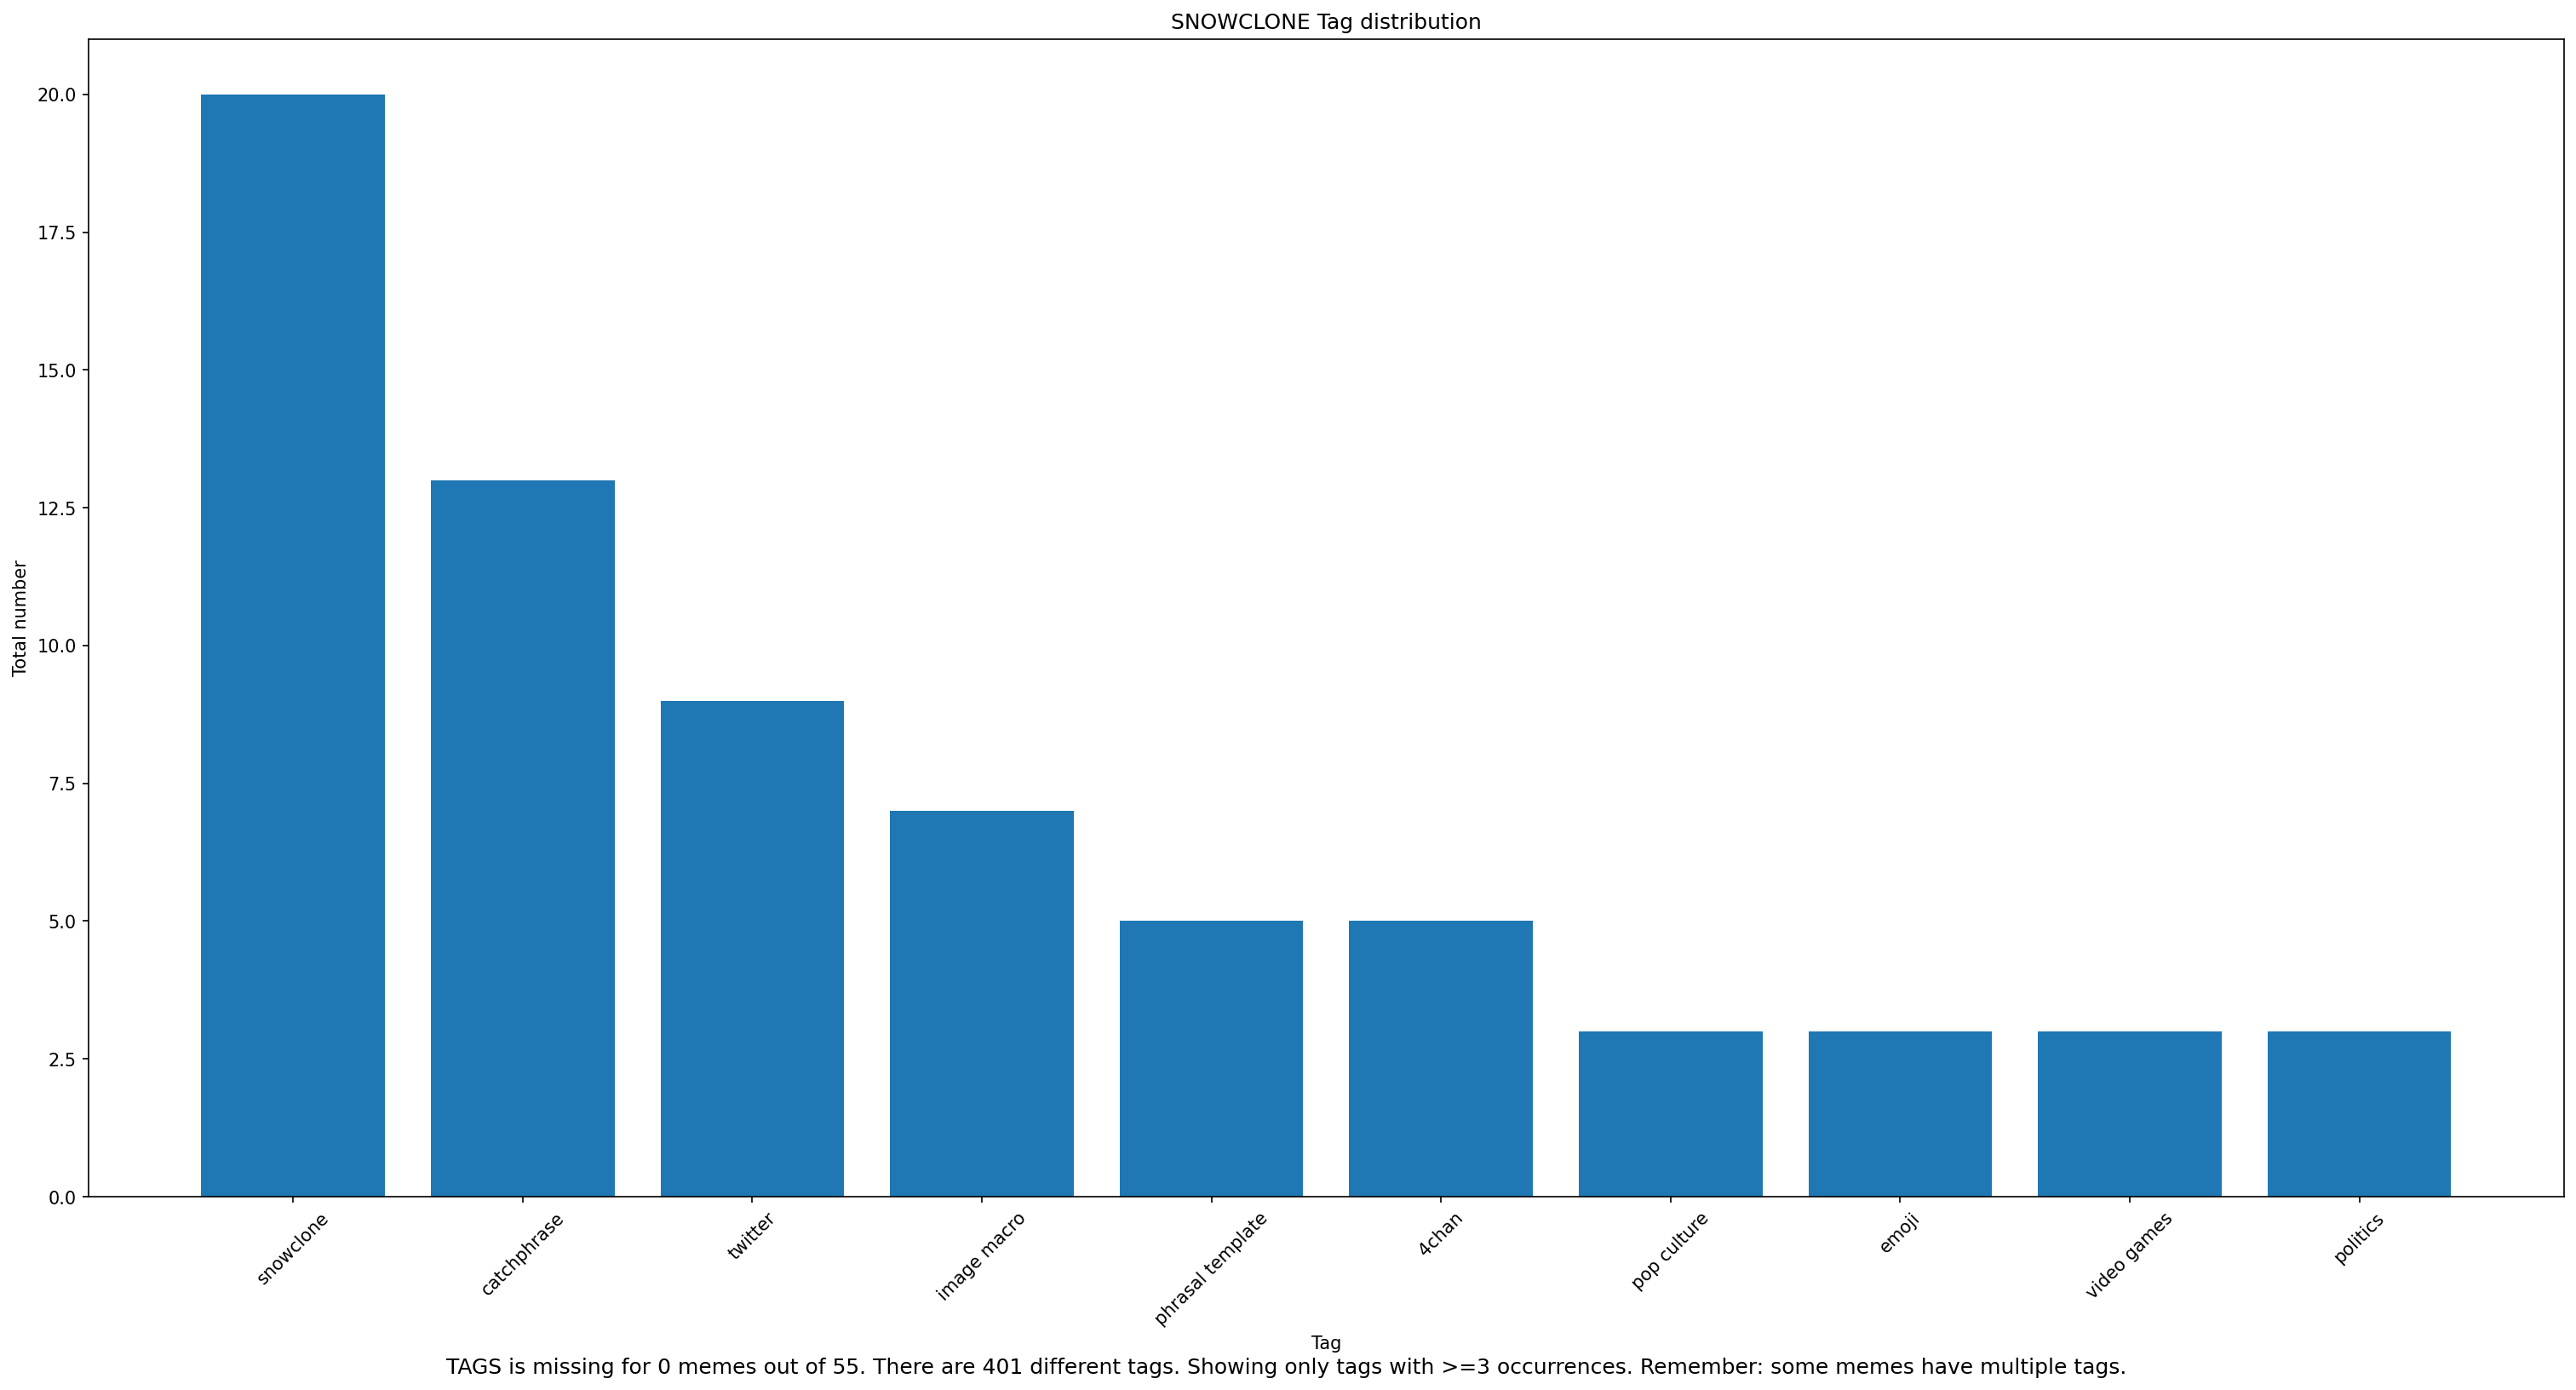

In [14]:
# Make frequency dictionary
data = snowclone

all_tags = []
missing = 0
for taglist in data["tags"]:
    for t in literal_eval(taglist):
        all_tags.append(t)
    if len(literal_eval(taglist)) == 0:
        missing += 1
        
tags_freq = Counter(all_tags)
text = "TAGS is missing for {} memes out of {}. There are {} different tags. Showing only tags with >=3 occurrences. Remember: some memes have multiple tags."\
      .format(missing, len(data), len(tags_freq))


# Create bar plot
plot_data = dict(tags_freq.most_common())
plot_data = {key:value for key,value in plot_data.items() if value >= 3}
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Tag')
plt.title("SNOWCLONE Tag distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/tags.png')
plt.show()

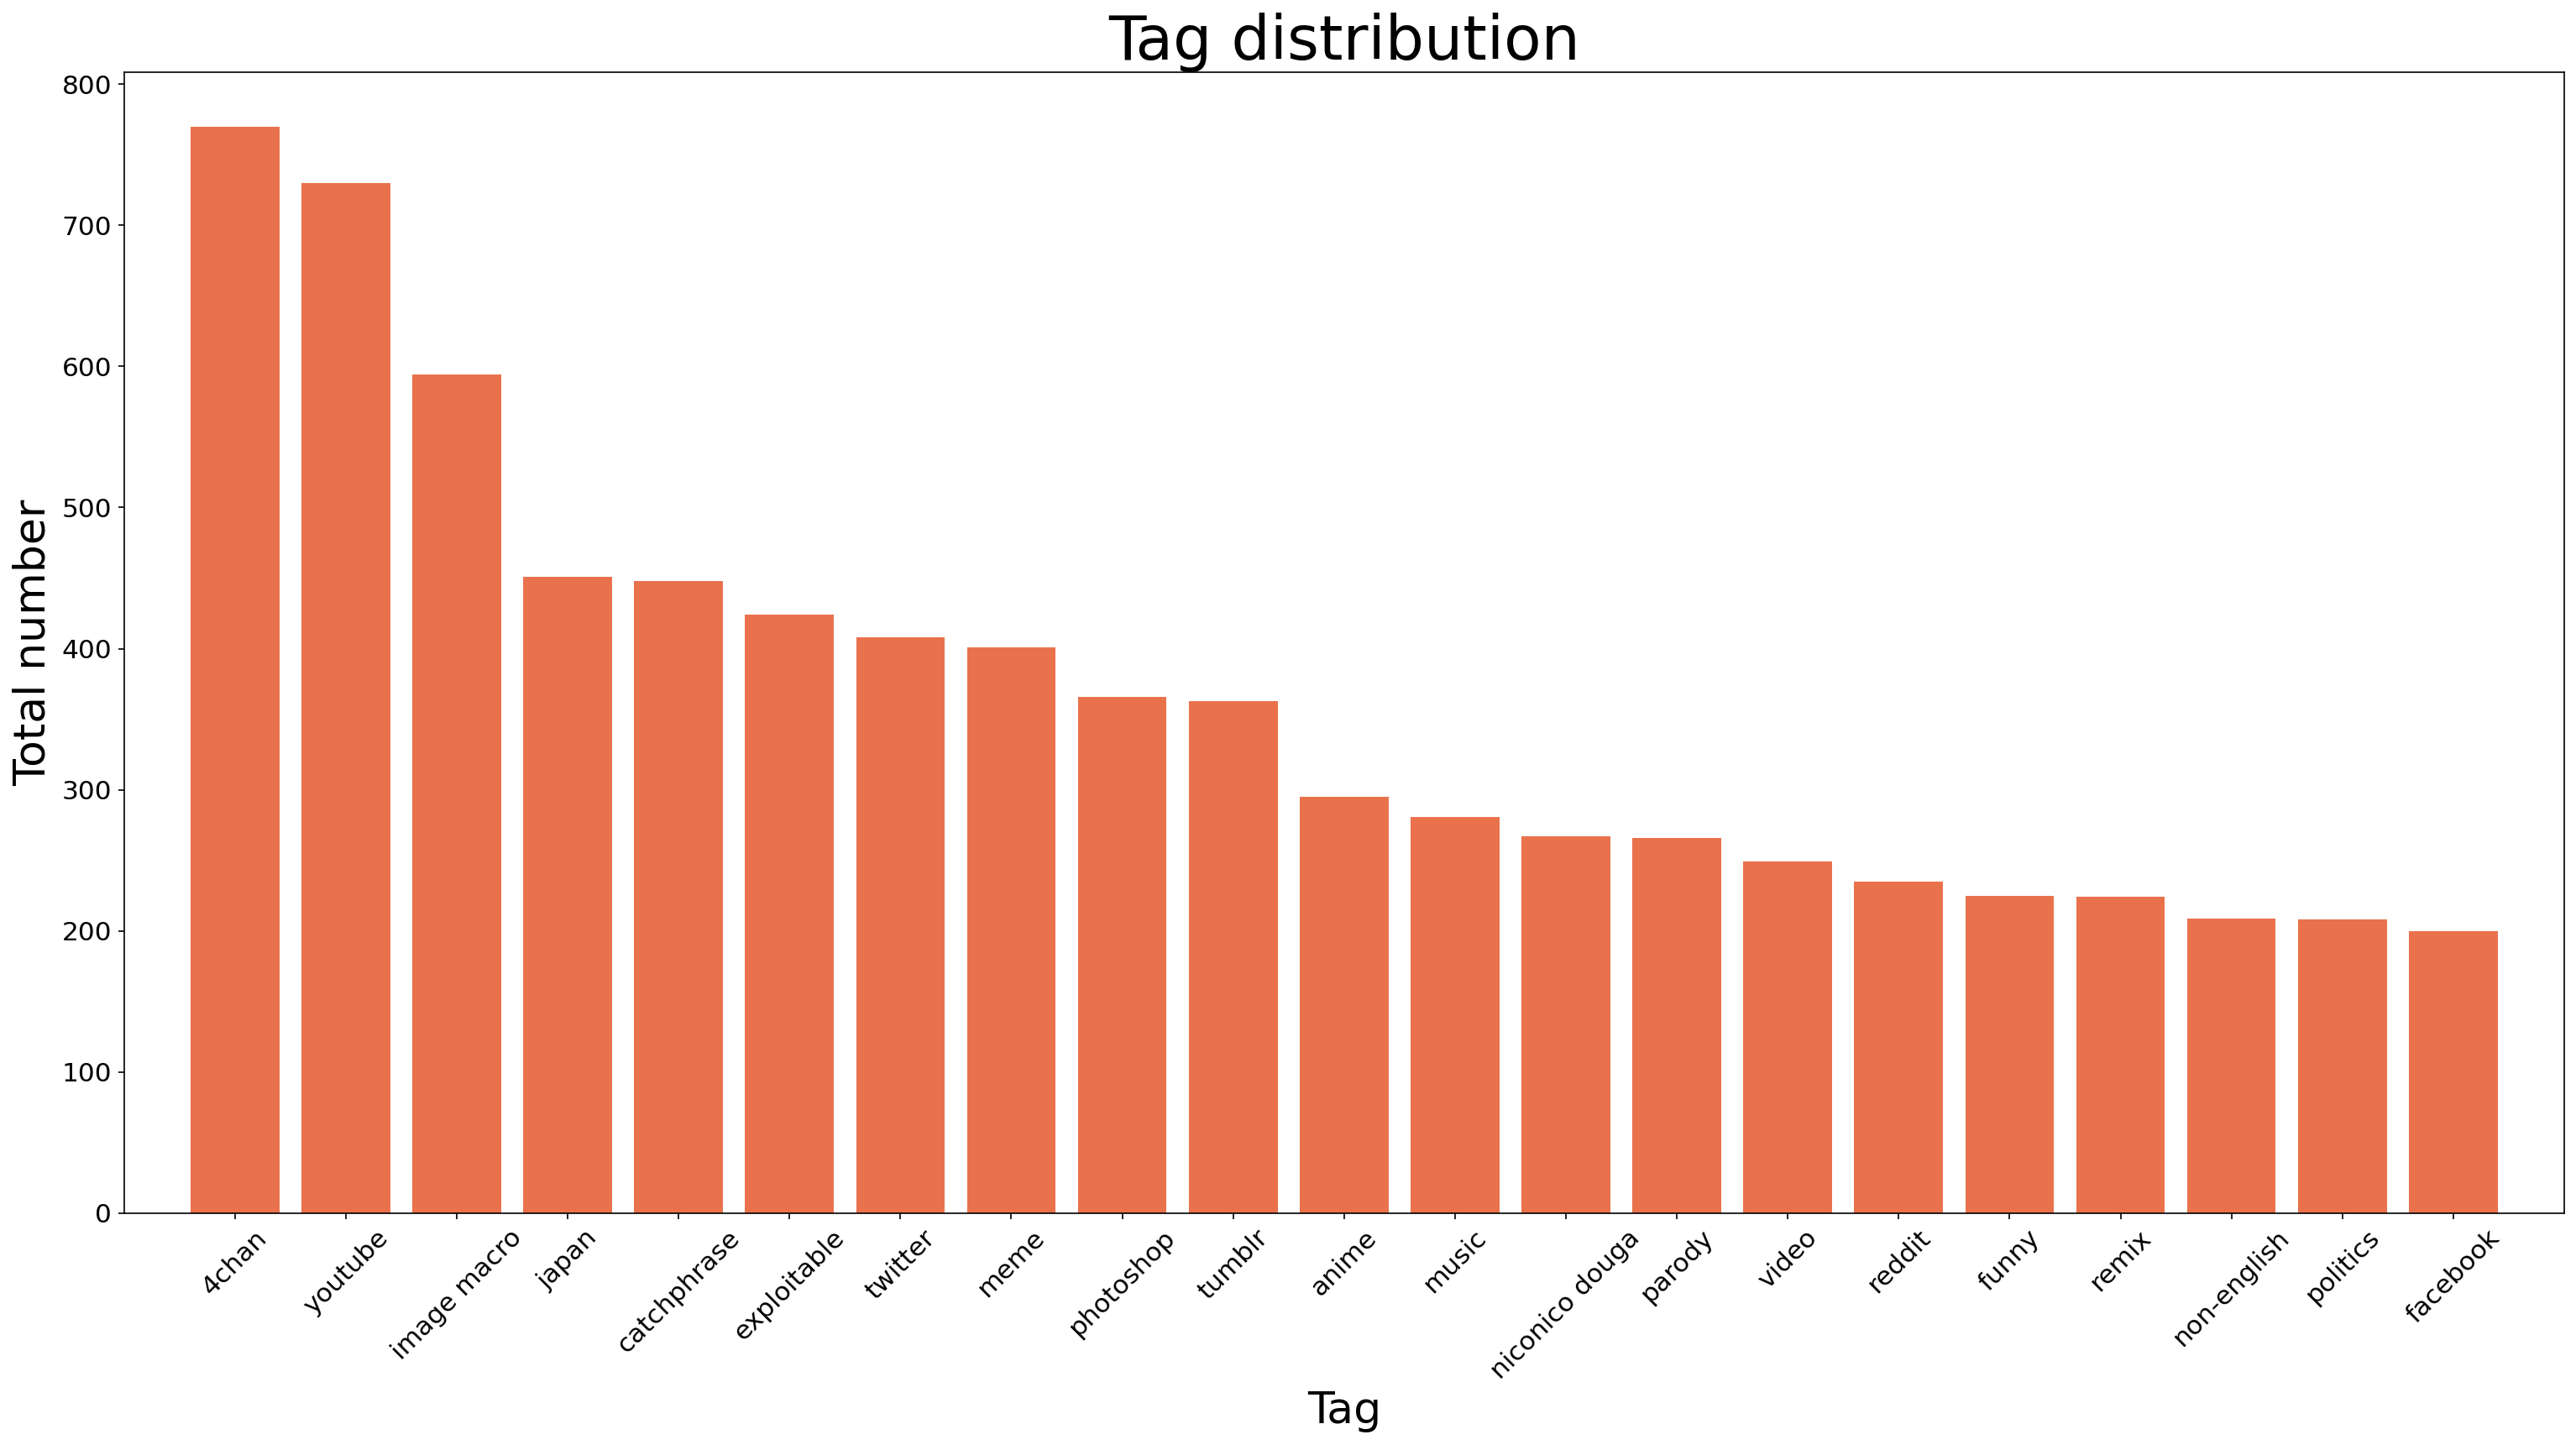

In [17]:
# Make frequency dictionary
data = memes

all_tags = []
missing = 0
for taglist in data["tags"]:
    for t in taglist:
        all_tags.append(t)
    if len(taglist) == 0:
        missing += 1
        
tags_freq = Counter(all_tags)
text = "TAGS is missing for {} memes out of {}. There are {} different tags. Showing only tags with >=3 occurrences. Remember: some memes have multiple tags."\
      .format(missing, len(data), len(tags_freq))


# Create bar plot
plot_data = dict(tags_freq.most_common())
plot_data = {key:value for key,value in plot_data.items() if value >= 200}
plt.bar(plot_data.keys(), plot_data.values(), color=hex3)
plt.ylabel('Total number', fontsize=medium_fontsize)
plt.xlabel('Tag', fontsize=medium_fontsize)
plt.title("Tag distribution", fontsize=large_fontsize)
plt.xticks(rotation = 45, fontsize=small_fontsize)
plt.yticks(fontsize=small_fontsize)
plt.xlim([-1,len(plot_data.keys())])
# plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/tags.png', bbox_inches='tight')
plt.show()